In [2]:
import time

import googlemaps
import pandas as pd
import requests

import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('./trip_advisor/common_info.csv', encoding='utf-8')

In [4]:
matplotlib inline

In [5]:
df.columns

Index(['Unnamed: 0', 'avg_rating', 'country', 'hotel_name', 'key', 'locality'], dtype='object')

In [6]:
df.dtypes

Unnamed: 0     int64
avg_rating     int64
country       object
hotel_name    object
key           object
locality      object
dtype: object

In [7]:
df.country.value_counts()

Italy                   383
China                   366
Thailand                323
Turkey                  281
Singapore               154
Greece                  140
Taiwan                  132
South Africa            108
France                   78
Spain                    58
Hungary                  51
Switzerland              48
Malaysia                 47
The Netherlands          40
Austria                  35
Poland                   34
Ireland                  30
Romania                  29
Germany                  23
Czech Republic           23
Ghana                    18
Bulgaria                 17
South Korea              15
Croatia                  15
Philippines              15
Kenya                     9
Indonesia                 8
Cambodia                  8
Australia                 6
Cyprus                    5
Mexico                    4
Portugal                  4
United Arab Emirates      4
Denmark                   3
Belgium                   2
Mariana Islands     

In [8]:
df['cnt'] = 1

In [9]:
ts = pd.pivot_table(df, values=['avg_rating', 'cnt'], index=['country'], aggfunc={'avg_rating': np.mean, 'cnt': np.sum}).sort_values(by='cnt', ascending=False) 
ts

avg_rating  cnt
country                              
Italy                  41.736292  383
China                  40.614754  366
Thailand               40.727554  323
Turkey                 40.088968  281
Singapore              40.714286  154
Greece                 42.821429  140
Taiwan                 42.424242  132
South Africa           40.416667  108
France                 41.217949   78
Spain                  43.103448   58
Hungary                41.960784   51
Switzerland            40.625000   48
Malaysia               39.574468   47
The Netherlands        42.125000   40
Austria                41.571429   35
Poland                 41.617647   34
Ireland                41.500000   30
Romania                42.241379   29
Czech Republic         45.652174   23
Germany                40.869565   23
Ghana                  39.444444   18
Bulgaria               40.882353   17
South Korea            43.000000   15
Croatia                42.333333   15
Philippines            42.666667   15
Kenya                  42.222222    9
Cambodia               47.500000    8
Indonesia              42.500000    8
Australia              44.166667    6
Cyprus                 45.000000    5
Mexico                 41.250000    4
Portugal               41.250000    4
United Arab Emirates   45.000000    4
Denmark                40.000000    3
Mariana Islands        40.000000    2
Belgium                40.000000    2
Slovenia               50.000000    1
Albania                50.000000    1
Peru                   40.000000    1
Nigeria                40.000000    1
New Zealand            45.000000    1
Morocco                50.000000    1
Argentina              45.000000    1
Israel                 30.000000    1
Colombia               45.000000    1
Canada                 45.000000    1
Brazil                 45.000000    1
Vietnam                35.000000    1

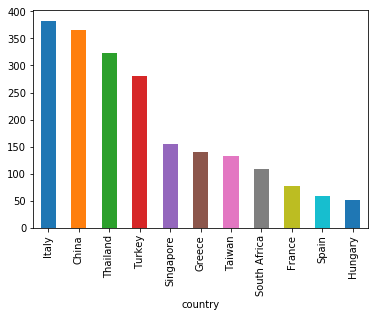

In [10]:
a = ts.sort_values(by='cnt', ascending=False).cnt[:11].plot(kind='bar').get_figure()
a.savefig('./top_10_country.png')

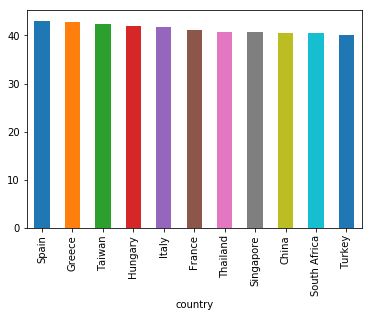

In [11]:
a= ts[:11].sort_values(by='avg_rating', ascending=False).avg_rating.plot(kind='bar').get_figure()
a.savefig('./top_10_rating.png')

In [12]:
# crawling rate: one bubble weight 10, now refine 5 in total score
(df.avg_rating).describe()

count    2530.000000
mean       41.266798
std         4.756420
min        15.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        50.000000
Name: avg_rating, dtype: float64

In [13]:
def high_rating(rating):
    if rating >= df.avg_rating.mean():
        return 1
    return 0

df['high_rating'] = df.avg_rating.apply(high_rating)
df

Unnamed: 0  avg_rating          country  \
0              0          45          Germany   
1              1          40           Greece   
2              2          40            Ghana   
3              3          40            Ghana   
4              4          45           Greece   
5              5          35           Greece   
6              6          40           Greece   
7              7          40           Greece   
8              8          40           Greece   
9              9          40           Greece   
10            10          45           Greece   
11            11          40           Greece   
12            12          40           Greece   
13            13          40           Greece   
14            14          40           Greece   
15            15          45           Greece   
16            16          45           Greece   
17            17          40           Greece   
18            18          40           Greece   
19            19          40     South Africa   
20            20          45     South Africa   
21            21          40     South Africa   
22            22          45     South Africa   
23            23          45     South Africa   
24            24          45     South Africa   
25            25          40     South Africa   
26            26          35     South Africa   
27            27          30     South Africa   
28            28          40     South Africa   
29            29          25     South Africa   
...          ...         ...              ...   
2500        2500          40  The Netherlands   
2501        2501          40  The Netherlands   
2502        2502          35  The Netherlands   
2503        2503          45  The Netherlands   
2504        2504          40           Greece   
2505        2505          35     South Africa   
2506        2506          35     South Africa   
2507        2507          45            Spain   
2508        2508          30            Spain   
2509        2509          45         Thailand   
2510        2510          40         Thailand   
2511        2511          45            Italy   
2512        2512          40            Italy   
2513        2513          45           Greece   
2514        2514          45           Greece   
2515        2515          45           Greece   
2516        2516          45           Greece   
2517        2517          40           Greece   
2518        2518          45           Greece   
2519        2519          45           Greece   
2520        2520          45           Greece   
2521        2521          40     South Africa   
2522        2522          40     South Africa   
2523        2523          40     South Africa   
2524        2524          35            Italy   
2525        2525          35            Italy   
2526        2526          40          Nigeria   
2527        2527          40      Philippines   
2528        2528          45            Italy   
2529        2529          40          Germany   

                                      hotel_name                 key  \
0                                       SOULMADE   g1010802-d8754256   
1                          Rhodes Lykia Boutique  g1012852-d10537289   
2               Best Western Plus Atlantic Hotel   g1015897-d3692226   
3                              Hotel Rosa Blanca   g1015945-d1074391   
4                                  Casa Cook Kos  g1016886-d12446998   
5                            Handa Station Hotel   g1019644-d1074174   
6     Chubu International Airport Centrair Hotel   g1019659-d1088558   
7                               Sanco Inn Toyota   g1019661-d1077979   
8                          Meitetsu Toyota Hotel   g1019661-d1088585   
9                        Sanco Inn Numazu-Ekimae   g1019668-d1097380   
10                       Shizutetsu Hotel Prezio   g1019668-d7046880   
11             Hotel Tetra Resort Shizuoka Yaizu   g1019672-d1075266   
12                            N

In [14]:
ts2 =pd.pivot_table(df, values=['avg_rating', 'cnt', 'high_rating'], index=['country'], aggfunc={'avg_rating': np.mean, 'cnt': np.sum, 'high_rating':np.sum }).sort_values(by='cnt', ascending=False) 
ts2

avg_rating  cnt  high_rating
country                                           
Italy                  41.736292  383          174
China                  40.614754  366          128
Thailand               40.727554  323          152
Turkey                 40.088968  281           79
Singapore              40.714286  154           54
Greece                 42.821429  140           76
Taiwan                 42.424242  132           70
South Africa           40.416667  108           44
France                 41.217949   78           35
Spain                  43.103448   58           33
Hungary                41.960784   51           24
Switzerland            40.625000   48           13
Malaysia               39.574468   47           13
The Netherlands        42.125000   40           21
Austria                41.571429   35           17
Poland                 41.617647   34           17
Ireland                41.500000   30           16
Romania                42.241379   29           17
Czech Republic         45.652174   23           21
Germany                40.869565   23           10
Ghana                  39.444444   18            4
Bulgaria               40.882353   17            7
South Korea            43.000000   15           10
Croatia                42.333333   15           10
Philippines            42.666667   15            8
Kenya                  42.222222    9            5
Cambodia               47.500000    8            6
Indonesia              42.500000    8            4
Australia              44.166667    6            4
Cyprus                 45.000000    5            5
Mexico                 41.250000    4            2
Portugal               41.250000    4            2
United Arab Emirates   45.000000    4            4
Denmark                40.000000    3            2
Mariana Islands        40.000000    2            0
Belgium                40.000000    2            0
Slovenia               50.000000    1            1
Albania                50.000000    1            1
Peru                   40.000000    1            0
Nigeria                40.000000    1            0
New Zealand            45.000000    1            1
Morocco                50.000000    1            1
Argentina              45.000000    1            1
Israel                 30.000000    1            0
Colombia               45.000000    1            1
Canada                 45.000000    1            1
Brazil                 45.000000    1            1
Vietnam                35.000000    1            0

In [15]:
ts2['above_mean%'] = ts2.high_rating / ts2.cnt 

In [16]:
ts2.loc[ts2.cnt >= 10].sort_values(by='above_mean%', ascending=False)

avg_rating  cnt  high_rating  above_mean%
country                                                   
Czech Republic    45.652174   23           21     0.913043
Croatia           42.333333   15           10     0.666667
South Korea       43.000000   15           10     0.666667
Romania           42.241379   29           17     0.586207
Spain             43.103448   58           33     0.568966
Greece            42.821429  140           76     0.542857
Philippines       42.666667   15            8     0.533333
Ireland           41.500000   30           16     0.533333
Taiwan            42.424242  132           70     0.530303
The Netherlands   42.125000   40           21     0.525000
Poland            41.617647   34           17     0.500000
Austria           41.571429   35           17     0.485714
Thailand          40.727554  323          152     0.470588
Hungary           41.960784   51           24     0.470588
Italy             41.736292  383          174     0.454308
France            41.217949   78           35     0.448718
Germany           40.869565   23           10     0.434783
Bulgaria          40.882353   17            7     0.411765
South Africa      40.416667  108           44     0.407407
Singapore         40.714286  154           54     0.350649
China             40.614754  366          128     0.349727
Turkey            40.088968  281           79     0.281139
Malaysia          39.574468   47           13     0.276596
Switzerland       40.625000   48           13     0.270833
Ghana             39.444444   18            4     0.222222

In [17]:
#df['country'].corr(df.avg_rating)
ts2.head()

avg_rating  cnt  high_rating  above_mean%
country                                             
Italy       41.736292  383          174     0.454308
China       40.614754  366          128     0.349727
Thailand    40.727554  323          152     0.470588
Turkey      40.088968  281           79     0.281139
Singapore   40.714286  154           54     0.350649

In [29]:
df1 = pd.read_csv('./trip_advisor/rating_info.csv', encoding='utf-8')
df2 = pd.read_csv('./trip_advisor/rating_info_500.csv', encoding='utf-8')
df3 = pd.read_csv('./trip_advisor/rating_info_1000.csv', encoding='utf-8')
df4 = pd.read_csv('./trip_advisor/rating_info_1500.csv', encoding='utf-8')
df5 = pd.read_csv('./trip_advisor/rating_info_2000.csv', encoding='utf-8')
df6 = pd.read_csv('./trip_advisor/rating_info_2500.csv', encoding='utf-8')
df = pd.concat([df1, df2, df3, df4, df5, df6])
df_group = df.groupby(['key'], as_index=False)['rating'].mean()
print(df_group.head())

df_common = df1 = pd.read_csv('./trip_advisor/common_info.csv', encoding='utf-8')
res = pd.merge(df_common, df_group, on='key', how='left')
print(res.head())

                  key     rating
0   g1010802-d8754256  43.571429
1  g1012852-d10537289  35.000000
2   g1015897-d3692226  37.916667
3   g1015945-d1074391  36.060606
4  g1016886-d12446998  44.326923
   Unnamed: 0  avg_rating  country                        hotel_name  \
0           0          45  Germany                          SOULMADE   
1           1          40   Greece             Rhodes Lykia Boutique   
2           2          40    Ghana  Best Western Plus Atlantic Hotel   
3           3          40    Ghana                 Hotel Rosa Blanca   
4           4          45   Greece                     Casa Cook Kos   

                  key                               locality     rating  
0   g1010802-d8754256  85748 Garching bei Munchen, Bavaria,   43.571429  
1  g1012852-d10537289                      Kallithea 85100,   35.000000  
2   g1015897-d3692226                     Sekondi-Takoradi,   37.916667  
3   g1015945-d1074391                         Iga 518-0222,   36.060606  

In [35]:
# since crawl data is after launching handy, cal average rating and compare with the whole rating of hotel
# average rating: res.avg_rating
# whole rating of hotel: res.rating
after_launch = res.loc[res.rating > res.avg_rating]
print(after_launch.count())

Unnamed: 0    1328
avg_rating    1328
country       1328
hotel_name    1328
key           1328
locality      1328
rating        1328
dtype: int64


In [37]:
after_launch[['hotel_name', 'rating', 'avg_rating']]

hotel_name     rating  avg_rating
5                                   Handa Station Hotel  38.000000          35
6            Chubu International Airport Centrair Hotel  42.500000          40
16                        Shima Kanko Hotel the Classic  48.000000          45
17                                Reiah Hotel Yokkaichi  50.000000          40
18                            Sanco Inn Yokkaichiekimae  42.500000          40
19                                  Krystal Beach Hotel  44.000000          40
21                                          Hotel Tenbo  42.000000          40
22                          Kagaya Bettei Matsunomidori  50.000000          45
23                    Mitsui Garden Hotel Kashiwa-no-ha  47.142857          45
26                             Hotel Livemax Sagamihara  40.000000          35
27                                    Hotel Karamatsuso  32.000000          30
28                                         Hotel Keisui  45.714286          40
29                            Biz Hotel Shiojiri Ekimae  26.000000          25
30                                   Hinanoyado Chitose  47.500000          45
33                            Hotel Livemax Iyo-Mishima  40.000000          35
35                              Hotel Livemax Amagasaki  40.000000          30
36                              Green Hill Hotel Akashi  37.500000          35
38                              Sasayama Holonpia Hotel  38.000000          35
39                    Livemax Resort Setouchi Sea Front  36.000000          35
40                               Hanamaki Onsen Kashoen  48.000000          45
41                             Yamanokami Onsen Yuukaen  46.666667          45
42                                Hotel Castle Yamagata  50.000000          35
43                       Richmond Hotel Yamagata-ekimae  48.750000          45
44                          Hotel Metropolitan Yamagata  44.000000          40
45                                          Ayu no Sato  45.000000          40
46                                  Hotel Sun Hitoyoshi  41.428571          35
47                           Value The Hotel Ishinomaki  40.000000          35
48                        Value The Hotel Sendai Natori  38.750000          30
49                                              Sankoen  43.333333          40
50                             Hotel Yugaf  Inn Okinawa  44.000000          40
...                                                 ...        ...         ...
2475                                      Riviera Hotel  38.000000          35
2477                                  Hotel Royal Macau  42.235772          40
2479                          New Orient Landmark Hotel  43.214286          40
2480                                    Metropark Hotel  38.333333          35
2481                                      Hotel Fortuna  40.000000          35
2482                                    Inn Hotel Macau  42.500000          40
2485                                 Crowne Plaza Macau  45.288889          45
2490                 The St. Regis Macao, Cotai Central  47.186147          45
2492                               Diamond Deluxe Hotel  46.971154          45
2493                                      Aegean Houses  48.035714          45
2497                        Secret Paradise Hotel & Spa  40.625000          40
2499  Villa Michelangelo Vicenza - Starhotels Collez...  46.666667          40
2502                  Aso Villa Park Hotel & Spa Resort  42.000000          35
2504                       Apollonia Beach Resort & Spa  42.500000          40
2505                                       Ocean Shores  37.000000          35
2506                         Burgundy Luxury Apartments  40.000000          35
2507                                          Cap Rocat  48.571429          45
2509                   Anantara Lawana Koh Samui Resort  47.105263          45
2510                        Chaweng Regent Beach Resort  43.194444          40
2511            

In [45]:
after_launch['country'].value_counts()

Italy                   200
China                   182
Thailand                161
Turkey                  143
Singapore                96
South Africa             73
Taiwan                   72
Greece                   65
France                   54
Switzerland              30
Malaysia                 25
Spain                    25
The Netherlands          24
Hungary                  19
Poland                   18
Ireland                  17
Austria                  15
Germany                  15
Ghana                    12
Czech Republic           11
South Korea               9
Romania                   8
Croatia                   8
Philippines               7
Bulgaria                  6
Kenya                     6
Cyprus                    4
United Arab Emirates      4
Mexico                    3
Indonesia                 2
Cambodia                  2
Australia                 2
Denmark                   2
Portugal                  2
Canada                    1
Colombia            

In [46]:
df.comment

0        Yes, this hotel has a soul. It´s the perfect p...
1        Stayed 10 weeks in Soulmade Garching. Friendly...
2        My boyfriend and me stayed for 2 nights in mid...
3        Just 20 min from center of city.. form hotel U...
4        Refreshing stay away from home that feels like...
5        Refreshing stay away from home that feels like...
6        Refreshing stay away from home that feels like...
7        What can I say. The place is relatively clean ...
8        We really enjoyed the staying in this hotel! W...
9        I find this quite a difficult review to write ...
10       +\nFriendly smily staff;\nCosy small beach wit...
11       I really enjoyed the location of the hotel but...
12       I really enjoyed the location of the hotel but...
13       this is my second time of staying here...am ac...
14       Great comfort away from Home. Western pleasure...
15       A very good hotel, good amenities, gentle stal...
16       When my husband had to work in Tokaradi he wou.

In [49]:
def capture_word(sentence):
    sentence = str(sentence)
    split = sentence.split()
    if "handy" in split:
        return 1
    return 0
df['handy_word'] = df.comment.apply(capture_word)

In [66]:
# handy mentioned time
df.loc[df.handy_word == 1].count()

Unnamed: 0             4351
comment                4425
key                    4425
rating                 4425
rating_date            4425
title                  4425
handy_word             4425
handy_word_sentence    4425
dtype: int64

In [70]:
df.count()

Unnamed: 0             524414
comment                541039
key                    541398
rating                 541398
rating_date            541398
title                  537618
handy_word             541399
handy_word_sentence    541399
dtype: int64

Unnamed: 0             5583
comment                5693
key                    5693
rating                 5693
rating_date            5693
title                  5693
handy_word             5693
handy_word_sentence    5693
dtype: int64